In [1]:
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/connection_graph.csv', header=0, low_memory = False)
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)
df = df[df['company'].str.contains('MPK')]
diff = pd.to_datetime(df['arrival_time']) - pd.to_datetime(df['departure_time'])
df['length'] = diff.dt.seconds // 60
df.drop(columns=['departure_time', 'arrival_time'])

df.head()

C:\Users\20meh\AppData\Local\Temp\ipykernel_2604\2366264016.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  diff = pd.to_datetime(df['arrival_time']) - pd.to_datetime(df['departure_time'])
C:\Users\20meh\AppData\Local\Temp\ipykernel_2604\2366264016.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  diff = pd.to_datetime(df['arrival_time']) - pd.to_datetime(df['departure_time'])


,company,line,departure_time,arrival_time,start_stop,end_stop,start_stop_lat,start_stop_lon,end_stop_lat,end_stop_lon,length
0,MPK Autobusy,A,20:00:00,20:01:00,KRZYKI,Sowia,51.074884,17.006569,51.073793,17.001845,1
1,MPK Autobusy,A,20:01:00,20:02:00,Sowia,Chłodna,51.073793,17.001845,51.075122,16.996671,1
2,MPK Autobusy,A,20:02:00,20:03:00,Chłodna,Wawrzyniaka,51.075122,16.996671,51.078074,16.998202,1
3,MPK Autobusy,A,20:03:00,20:05:00,Wawrzyniaka,Rymarska,51.078074,16.998202,51.079323,16.991258,2
4,MPK Autobusy,A,20:05:00,20:06:00,Rymarska,RACŁAWICKA,51.079323,16.991258,51.077395,16.983938,1


In [6]:
G = nx.DiGraph()

for _, row in df.iterrows():
    start = row['start_stop']
    end = row['end_stop']
    length = row['length']
    line = row['line']

    if G.has_edge(start, end):
        G[start][end]['count'] += 1
        G[start][end]['length'].append(length)
        G[start][end]['lines'].add(line)
    else:
        G.add_edge(start, end, count=1, length=[length], lines = {line})
    
for u, v, data in G.edges(data=True):
    data['length'] = max(set(data['length']), key=data['length'].count)
    data['lines'] = len(data['lines'])

In [7]:
for u, v, data in G.edges(data=True):
    print(f"{u} -> {v}: Liczba przejazdów: {data['count']}, Modalna długość: {data['length']}, Liczba unikatowych linii: {data['lines']}")

KRZYKI -> Sowia: Liczba przejazdów: 123, Modalna długość: 1, Liczba unikatowych linii: 3
KRZYKI -> Zimowa: Liczba przejazdów: 76, Modalna długość: 1, Liczba unikatowych linii: 1
KRZYKI -> Orla: Liczba przejazdów: 393, Modalna długość: 2, Liczba unikatowych linii: 8
KRZYKI -> Radio i Telewizja: Liczba przejazdów: 168, Modalna długość: 1, Liczba unikatowych linii: 2
KRZYKI -> Zajezdnia BOREK: Liczba przejazdów: 11, Modalna długość: 2, Liczba unikatowych linii: 2
KRZYKI -> Przyjaźni: Liczba przejazdów: 117, Modalna długość: 2, Liczba unikatowych linii: 2
KRZYKI -> PARK POŁUDNIOWY: Liczba przejazdów: 81, Modalna długość: 2, Liczba unikatowych linii: 5
KRZYKI -> KRZYKI: Liczba przejazdów: 2, Modalna długość: 1, Liczba unikatowych linii: 1
KRZYKI -> Partynice (tor wyścigów konnych): Liczba przejazdów: 12, Modalna długość: 4, Liczba unikatowych linii: 1
KRZYKI -> Hallera: Liczba przejazdów: 12, Modalna długość: 3, Liczba unikatowych linii: 1
Sowia -> Chłodna: Liczba przejazdów: 174, Modalna d

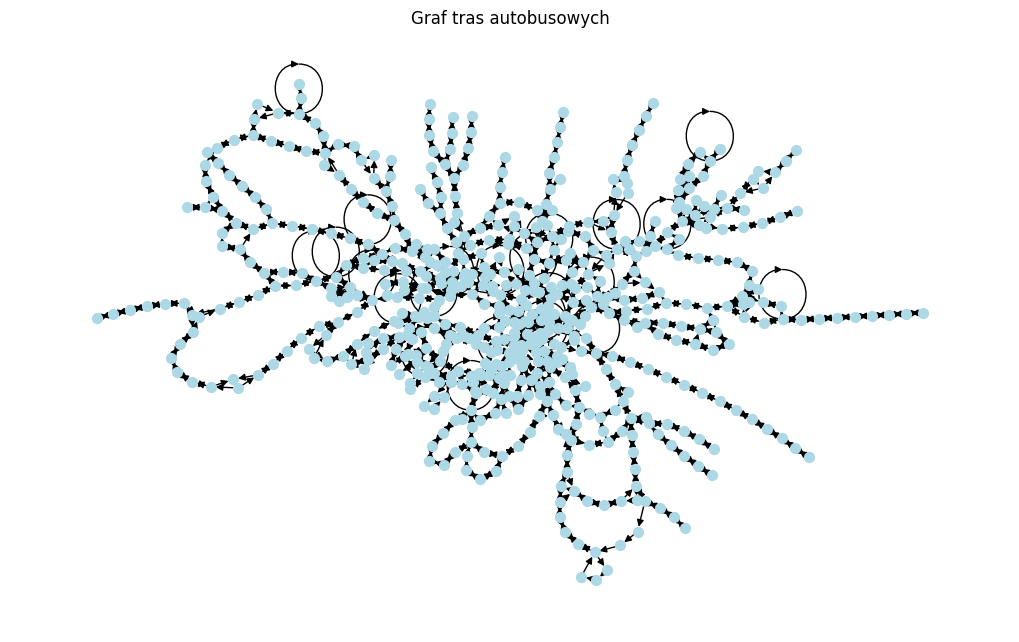

In [12]:
pos = nx.kamada_kawai_layout(G) 
edge_labels = nx.get_edge_attributes(G, 'Weight')  

plt.figure(figsize=(10, 6))
nx.draw(G, pos, node_size=50, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graf tras autobusowych")
plt.show()